# **ANÁLISE SOCIOECONÔMICA DOS CASOS DE DENGUE NO BRASIL - 2023**

## **1. Importando bibliotecas**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Importando Dataset e Tratamentos Preliminares**

In [7]:
df = pd.read_csv('dengue_resumido_V3.csv', sep=';')
df

,DT_NOTIFIC,ID_MUNICIP,SG_UF_NOT,DT_SIN_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,...,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,Faixa Etária
0,2023-01-01,120070,12,2023-01-01,2005.0,17.0,Feminino,Não,Parda,Ignorado,...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,15 a 19
1,2023-01-02,120005,12,2023-01-01,1971.0,51.0,Feminino,Não,Ignorado,Ignorado,...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,50 a 54
2,2023-01-02,120005,12,2023-01-01,1995.0,27.0,Feminino,Ignorado,Ignorado,Ignorado,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,25 a 29
3,2023-01-02,120030,12,2023-01-01,2002.0,20.0,Masculino,Não se aplica,Parda,Ignorado,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,20 a 24
4,2023-01-02,120005,12,2023-01-02,1990.0,32.0,Masculino,Não se aplica,Ignorado,Ignorado,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,30 a 34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505434,2023-12-28,172120,17,2023-12-26,1986.0,37.0,Feminino,Não,Parda,Ensino superior completo,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,35 a 39
1505435,2023-12-29,170700,17,2023-12-28,1984.0,39.0,Feminino,Não,Parda,Ensino Médio completo,...,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,35 a 39
1505436,2023-12-29,170820,17,2023-12-25,1971.0,52.0,Feminino,Não se aplica,Preta,Fundamental completo,...,Não,Não,Não,Não,Não,Não,Sim,Não,Não,50 a 54
1505437,2023-12-29,170700,17,2023-12-28,1996.0,27.0,Feminino,Não,Parda,Ignorado,...,Não,Não,Não,Não,Não,Não,Sim,Não,Não,25 a 29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505439 entries, 0 to 1505438
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DT_NOTIFIC    1505439 non-null  object 
 1   ID_MUNICIP    1505439 non-null  int64  
 2   SG_UF_NOT     1505439 non-null  int64  
 3   DT_SIN_PRI    1505439 non-null  object 
 4   ANO_NASC      1497625 non-null  float64
 5   NU_IDADE_N    1505439 non-null  float64
 6   CS_SEXO       1505439 non-null  object 
 7   CS_GESTANT    1505439 non-null  object 
 8   CS_RACA       1505439 non-null  object 
 9   CS_ESCOL_N    1505439 non-null  object 
 10  HOSPITALIZ    1112856 non-null  float64
 11  EVOLUCAO      1235671 non-null  float64
 12  DT_OBITO      1531 non-null     object 
 13  FEBRE         1505439 non-null  object 
 14  MIALGIA       1505439 non-null  object 
 15  CEFALEIA      1505439 non-null  object 
 16  EXANTEMA      1505439 non-null  object 
 17  VOMITO        1505439 non-n

## **3. ANÁLISE EXPLORATÓRIA DOS DADOS**

### **3.1 Casos de Dengue por Estado do Brasil**

•	Qual é a distribuição dos casos de dengue por estado (SG_UF_NOT)?

•	Quais estados tiveram as maiores e menores taxas de notificação (TP_NOT) de dengue em 2023?

•	Como a distribuição dos casos de dengue varia ao longo das semanas (SEM_NOT) em diferentes estados?

•	Existe correlação entre as características regionais (ID_REGIONA) e a frequência de notificações?


### **3.2 Evolução Temporal do Número de Casos**

•	Como a incidência de dengue variou ao longo do ano de 2023, considerando SEM_NOT e DT_NOTIFIC (é preciso dividir as semanas com base nos dias para ter uma noção do mês de incidência)?

•	Existe alguma correlação entre períodos de pico de casos e as estações do ano?

•	Quais meses tiveram o maior aumento nos casos de dengue, e como isso se relaciona com as condições sazonais e regionais?


In [5]:
df['DT_NOTIFIC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1505439 entries, 0 to 1505438
Series name: DT_NOTIFIC
Non-Null Count    Dtype 
--------------    ----- 
1505439 non-null  object
dtypes: object(1)
memory usage: 11.5+ MB


In [9]:
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'],format='%Y-%m-%d')
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'],format='%Y-%m-%d')

In [10]:
#Criando uma coluna para o casos por mês
df['MES_ANO'] = df['DT_NOTIFIC'].dt.to_period('M')

In [11]:
df['MES_ANO'].unique()

<PeriodArray>
['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
 '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
Length: 12, dtype: period[M]

In [21]:
casos_por_mes = df.groupby('MES_ANO').size().reset_index(name='NUM_CASOS')
print(casos_por_mes)

    MES_ANO  NUM_CASOS
0   2023-01      56466
1   2023-02     122691
2   2023-03     295252
3   2023-04     388722
4   2023-05     301552
5   2023-06     103839
6   2023-07      41671
7   2023-08      27928
8   2023-09      21131
9   2023-10      24534
10  2023-11      38378
11  2023-12      83275


In [23]:
casos_por_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   MES_ANO    12 non-null     period[M]
 1   NUM_CASOS  12 non-null     int64    
dtypes: int64(1), period[M](1)
memory usage: 320.0 bytes


In [24]:
# Converte 'MES_ANO' para string
casos_por_mes['MES_ANO'] = casos_por_mes['MES_ANO'].astype(str)

In [26]:
# Mapeamento de 'MES_ANO' para os nomes dos meses em português
mes_map = {
    '2023-01': 'Jan', '2023-02': 'Fev', '2023-03': 'Mar', '2023-04': 'Abr',
    '2023-05': 'Mai', '2023-06': 'Jun', '2023-07': 'Jul', '2023-08': 'Ago',
    '2023-09': 'Set', '2023-10': 'Out', '2023-11': 'Nov', '2023-12': 'Dez'
}

# Substitui os valores na coluna 'MES_ANO'
casos_por_mes['MES_ANO'] = casos_por_mes['MES_ANO'].replace(mes_map)

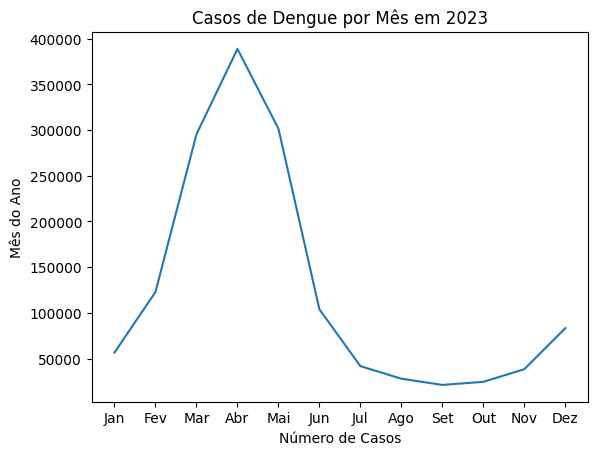

In [27]:
# Gera o gráfico diretamente
plt.plot(casos_por_mes['MES_ANO'], casos_por_mes['NUM_CASOS'])
plt.xlabel('Número de Casos')
plt.ylabel('Mês do Ano')
plt.title('Casos de Dengue por Mês em 2023')
plt.show()

### **3.3 Indicadores Sociodemográficos**

•	Qual é a distribuição etária (NU_IDADE_N) dos casos de dengue? Existe uma faixa etária mais vulnerável?

•	Como a distribuição dos casos de dengue varia entre os diferentes sexos (CS_SEXO)?

•	Qual é a distribuição dos casos de dengue entre diferentes grupos raciais (CS_RACA)?

•	Há alguma relação entre o nível de escolaridade (CS_ESCOL_N) e a incidência de dengue?

•	Qual é a distribuição dos casos de dengue entre gestantes (CS_GESTANT)?


#### **3.3.1 Pirâmide Etária dos Casos de Dengue**

Verificando valores únicos e valores nulos na coluna NU_IDADE_N

In [5]:
df['NU_IDADE_N'].unique()

array([ 17.,  51.,  27.,  20.,  32.,  18.,  23.,  63.,  15.,  45.,  50.,
        26.,  25.,  24.,  52.,  53., 101.,  40.,   9.,  19.,  39.,   1.,
        43.,  12.,  41.,  47.,  38.,  42.,  31.,  35.,  13.,  61.,  59.,
        73.,  16.,  36.,  28.,  66.,  30.,   2.,  21.,  10.,   5.,  82.,
        37.,  29.,  11.,  48.,  62.,  34.,   6.,  22.,   7.,  69.,  14.,
        33.,   8.,  75.,  49.,  58.,  57.,  55.,  74.,   4.,  91.,  44.,
        46.,  56.,  71.,   3.,  79.,  60.,  70.,  76.,  67.,  54.,  65.,
        64.,  68.,  78.,  72.,  92.,  85.,  90.,  84.,  89.,  77.,  81.,
       106.,  83.,  80., 104.,  86.,  88.,  93.,  87.,  94., 105.,  96.,
        95.,  98., 103.,  97.,  99., 100., 109., 123.,   0., 110., 121.,
       102., 113., 108., 119., 107., 112., 111., 117., 116., 114., 118.,
       115., 122.])

In [6]:
df['NU_IDADE_N'].isnull().sum()

0

**Tabulando as informações por Gênero e Faixa Etária**

In [7]:
df['CS_SEXO'].value_counts()

CS_SEXO
Feminino     808741
Masculino    694353
Ignorado       2345
Name: count, dtype: int64

In [8]:
#Frequência dos casos de dengue por faixa etária em homens
df_masculino = df.query('CS_SEXO == "Masculino"')
frequencia_masculino = df_masculino['Faixa Etária'].value_counts()
frequencia_masculino

Faixa Etária
20 a 24    69129
25 a 29    65549
15 a 19    64418
10 a 14    63058
30 a 34    58107
35 a 39    54972
40 a 44    51870
5 a 9      46843
45 a 49    42435
50 a 54    36691
55 a 59    32276
0 a 4      28332
60 a 64    26677
65 a 69    20573
70 a 74    14689
75 a 79     9371
80+         9363
Name: count, dtype: int64

In [9]:
#Frequência dos casos de dengue por faixa etária em mulheres
df_feminino = df.query('CS_SEXO == "Feminino"')
frequencia_feminino = df_feminino['Faixa Etária'].value_counts()
frequencia_feminino

Faixa Etária
20 a 24    76693
25 a 29    76467
30 a 34    69913
35 a 39    69258
40 a 44    68279
15 a 19    64462
45 a 49    58341
50 a 54    52491
10 a 14    50990
55 a 59    46530
5 a 9      40898
60 a 64    37064
65 a 69    27997
0 a 4      24934
70 a 74    19440
80+        12684
75 a 79    12300
Name: count, dtype: int64

Setando um dicionário das faixas etárias para a criação da pirâmide etária

In [10]:
faixas_etarias = {
    "80+": (80, 200),
    "75 a 79": (75, 79),
    "70 a 74": (70, 74),
    "65 a 69": (65, 69),
    "60 a 64": (60, 64),
    "55 a 59": (55, 59),
    "50 a 54": (50, 54),
    "45 a 49": (45, 49),
    "40 a 44": (40, 44),
    "35 a 39": (35, 39),
    "30 a 34": (30, 34),
    "25 a 29": (25, 29),
    "20 a 24": (20, 24),
    "15 a 19": (15, 19),
    "10 a 14": (10, 14),
    "5 a 9": (5, 9),
    "0 a 4": (0, 4)
}

In [11]:
# Criar o DataFrame tabulado
tab_piramide_etaria = pd.DataFrame({'Homens': frequencia_masculino, 'Mulheres': frequencia_feminino})
tab_piramide_etaria.rename(columns={'index': 'Faixa Etária'}, inplace=True)

# Renomear a coluna 'index' para 'Faixa Etária'
tab_piramide_etaria.index.name = 'Faixa Etária'
tab_piramide_etaria = tab_piramide_etaria.reset_index()

#Ordenando as faixas etárias
ordem_faixas = list(faixas_etarias.keys())
tab_piramide_etaria['Faixa Etária'] = pd.Categorical(tab_piramide_etaria['Faixa Etária'], categories=ordem_faixas, ordered=True)
tab_piramide_etaria = tab_piramide_etaria.sort_values('Faixa Etária')

tab_piramide_etaria

,Faixa Etária,Homens,Mulheres
16,80+,9363,12684
15,75 a 79,9371,12300
14,70 a 74,14689,19440
13,65 a 69,20573,27997
12,60 a 64,26677,37064
11,55 a 59,32276,46530
10,50 a 54,36691,52491
8,45 a 49,42435,58341
7,40 a 44,51870,68279
6,35 a 39,54972,69258


**Plotando a Pirâmide Etária (pessoas)**

In [12]:
tab_piramide_etaria['Homens'] = tab_piramide_etaria['Homens'] * -1
tab_piramide_etaria['Mulheres'] = tab_piramide_etaria['Mulheres']

In [13]:
tab_piramide_etaria

,Faixa Etária,Homens,Mulheres
16,80+,-9363,12684
15,75 a 79,-9371,12300
14,70 a 74,-14689,19440
13,65 a 69,-20573,27997
12,60 a 64,-26677,37064
11,55 a 59,-32276,46530
10,50 a 54,-36691,52491
8,45 a 49,-42435,58341
7,40 a 44,-51870,68279
6,35 a 39,-54972,69258


c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


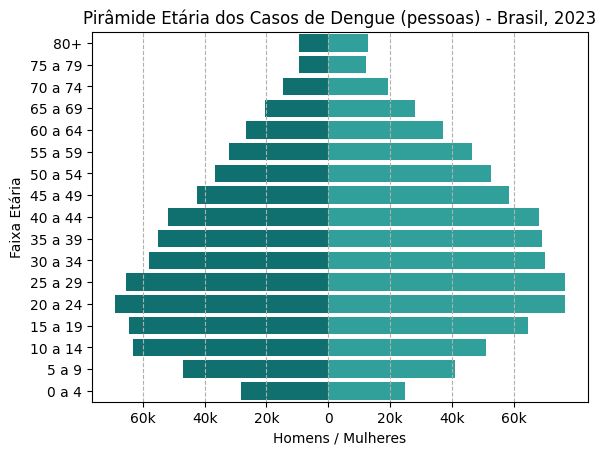

In [14]:
ax1 = sns.barplot(x='Homens', y='Faixa Etária', data=tab_piramide_etaria, order=ordem_faixas, color="teal")
ax2 = sns.barplot(x='Mulheres', y='Faixa Etária', data=tab_piramide_etaria, order=ordem_faixas, color="lightseagreen")
plt.title("Pirâmide Etária dos Casos de Dengue (pessoas) - Brasil, 2023")
plt.xlabel("Homens / Mulheres")
plt.grid(axis='x', linestyle = '--')
plt.xticks(ticks=[-60000, -40000, -20000, 0, 20000, 40000, 60000],
labels=['60k', '40k', '20k', '0', '20k', '40k', '60k'])
plt.show()

**Plotando a Pirâmide Etária (%)**

In [15]:
tab_piramide_etaria_percent = pd.DataFrame({
    'Homens': frequencia_masculino,
    'Mulheres': frequencia_feminino
})

# Renomear a coluna 'index' para 'Faixa Etária'
tab_piramide_etaria_percent.index.name = 'Faixa Etária'
tab_piramide_etaria_percent = tab_piramide_etaria_percent.reset_index()

# Ordenar as faixas etárias
ordem_faixas = list(faixas_etarias.keys())
tab_piramide_etaria_percent['Faixa Etária'] = pd.Categorical(tab_piramide_etaria_percent['Faixa Etária'], categories=ordem_faixas, ordered=True)
tab_piramide_etaria_percent = tab_piramide_etaria_percent.sort_values('Faixa Etária')

# Calcular o total de registros
total_etaria = tab_piramide_etaria_percent['Homens'].sum() + tab_piramide_etaria_percent['Mulheres'].sum()

# Calcular a frequência relativa (percentual)
tab_piramide_etaria_percent['Homens (%)'] = (tab_piramide_etaria_percent['Homens'] / total_etaria) * 100
tab_piramide_etaria_percent['Mulheres (%)'] = (tab_piramide_etaria_percent['Mulheres'] / total_etaria) * 100

#Deixando o percentual de homens no negativo para plotar a pirâmide
tab_piramide_etaria_percent['Homens (%)'] = tab_piramide_etaria_percent['Homens (%)'] * -1

tab_piramide_etaria_percent

,Faixa Etária,Homens,Mulheres,Homens (%),Mulheres (%)
16,80+,9363,12684,-0.622915,0.843859
15,75 a 79,9371,12300,-0.623447,0.818312
14,70 a 74,14689,19440,-0.977251,1.293332
13,65 a 69,20573,27997,-1.368710,1.862625
12,60 a 64,26677,37064,-1.774806,2.465847
11,55 a 59,32276,46530,-2.147304,3.095615
10,50 a 54,36691,52491,-2.441032,3.492197
8,45 a 49,42435,58341,-2.823177,3.881394
7,40 a 44,51870,68279,-3.450882,4.542564
6,35 a 39,54972,69258,-3.657256,4.607696


c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


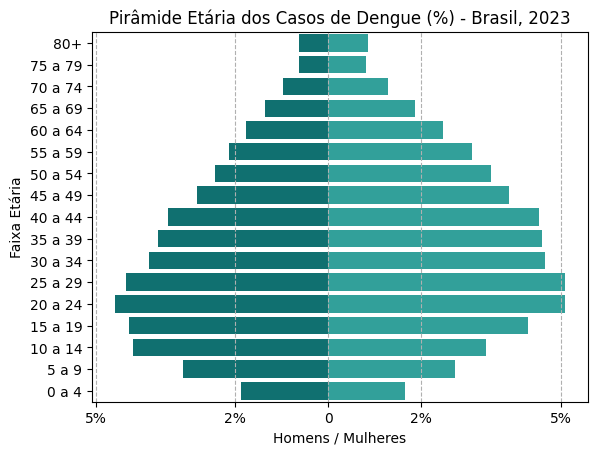

In [16]:
ax1 = sns.barplot(x='Homens (%)', y='Faixa Etária', data=tab_piramide_etaria_percent, order=ordem_faixas, color="teal")
ax2 = sns.barplot(x='Mulheres (%)', y='Faixa Etária', data=tab_piramide_etaria_percent, order=ordem_faixas, color="lightseagreen")
plt.title("Pirâmide Etária dos Casos de Dengue (%) - Brasil, 2023")
plt.xlabel("Homens / Mulheres")
plt.grid(axis='x', linestyle = '--')
plt.xticks(ticks=[-5, -2, 0, 2, 5],
labels=['5%', '2%', '0', '2%', '5%'])
plt.show()

#### **3.3.2 Distribuição dos Casos de Dengue por Sexo**

Segundo do dicionário de dados do SINAN, o sexo do paciente é definido por:

M- Masculino

F- Feminino

I- Ignorado

In [17]:
df['CS_SEXO'].value_counts()

CS_SEXO
Feminino     808741
Masculino    694353
Ignorado       2345
Name: count, dtype: int64

In [18]:
frequencia_sexo = df['CS_SEXO'].value_counts()
frequencia_relativa_sexo = round(df['CS_SEXO'].value_counts(normalize = True) * 100, 2)

# Criar o DataFrame tabulado
tab_sexo = pd.DataFrame({'Frequência': frequencia_sexo, 'Percentual (%)': frequencia_relativa_sexo})
tab_sexo.rename(columns={'index': 'Sexo'}, inplace=True)

# Renomear a coluna 'index' para 'Faixa Etária'
tab_sexo.index.name = 'Sexo'
tab_sexo = tab_sexo.reset_index()

tab_sexo

,Sexo,Frequência,Percentual (%)
0,Feminino,808741,53.72
1,Masculino,694353,46.12
2,Ignorado,2345,0.16


Plotando gráfico de pizza

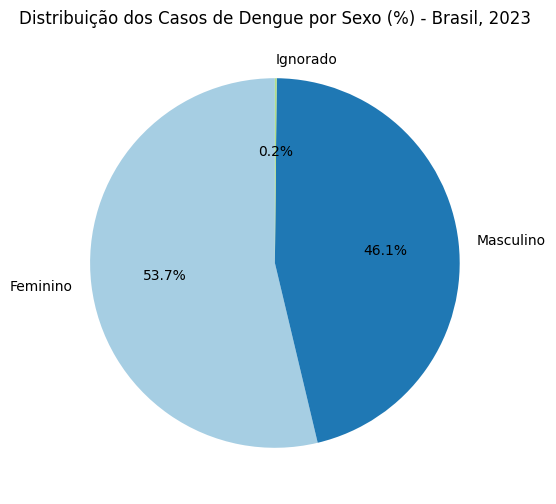

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(
    tab_sexo['Frequência'], 
    labels=tab_sexo['Sexo'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribuição dos Casos de Dengue por Sexo (%) - Brasil, 2023')
plt.show()

#### **3.3.3 Distribuição dos Casos de Dengue por Etnia**

Vamos observar os valores únicos da coluna 'CS_RACA'

In [20]:
df['CS_RACA'].unique()

array(['Parda', 'Ignorado', 'Branca', 'Indígena', 'Preta', 'Amarela'],
      dtype=object)

In [21]:
df['CS_RACA'].value_counts()

CS_RACA
Branca      659244
Parda       525572
Ignorado    236605
Preta        65170
Amarela      15821
Indígena      3027
Name: count, dtype: int64

Tabulando as informações de Etnia

In [22]:
frequencia_etnia = df['CS_RACA'].value_counts()
frequencia_relativa_etnia = round(df['CS_RACA'].value_counts(normalize = True) * 100, 2)

# Criar o DataFrame tabulado
tab_etnia = pd.DataFrame({'Frequência': frequencia_etnia, 'Percentual (%)': frequencia_relativa_etnia})
tab_etnia.rename(columns={'index': 'Etnia'}, inplace=True)

# Renomear a coluna 'index' para 'Faixa Etária'
tab_etnia.index.name = 'Etnia'
tab_etnia = tab_etnia.reset_index()

#Invertendo a ordem para a plotagem
tab_etnia = tab_etnia.sort_values(by = 'Percentual (%)', ascending = True)

tab_etnia

,Etnia,Frequência,Percentual (%)
5,Indígena,3027,0.20
4,Amarela,15821,1.05
3,Preta,65170,4.33
2,Ignorado,236605,15.72
1,Parda,525572,34.91
0,Branca,659244,43.79


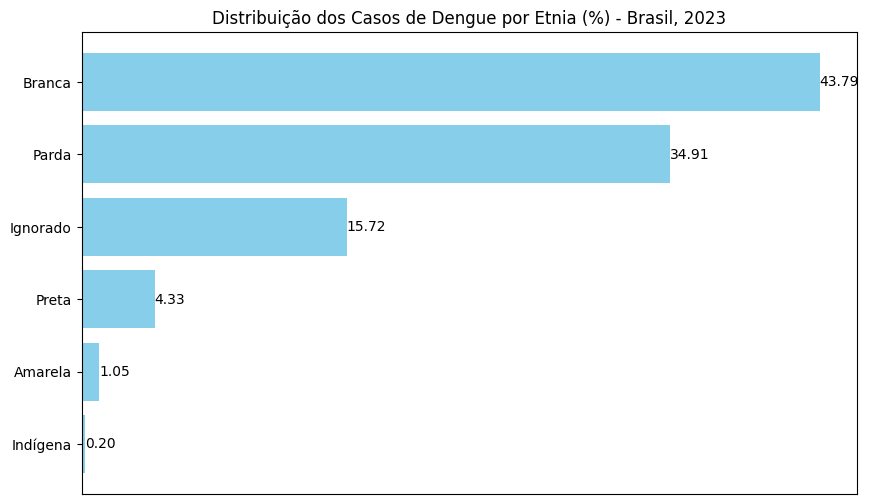

In [23]:
#Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(tab_etnia['Etnia'], tab_etnia['Percentual (%)'].sort_values(), color='skyblue')
plt.title('Distribuição dos Casos de Dengue por Etnia (%) - Brasil, 2023')
plt.xticks([])

# Exibir os valores em cada barra
for index, value in enumerate(tab_etnia['Percentual (%)'].sort_values()):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

Plotando um gráfico Pizza que agrupe as etnias em Branca, Não Branca e Ignorado

In [24]:
branca = tab_etnia[tab_etnia['Etnia'] == 'Branca']['Frequência'].sum()
nao_branca = tab_etnia[tab_etnia['Etnia'].isin(['Parda', 'Preta', 'Amarela', 'Indígena'])]['Frequência'].sum()
ignorado = tab_etnia[tab_etnia['Etnia'] == 'Ignorado']['Frequência'].sum()
total = branca + nao_branca + ignorado

In [25]:
tab_etnia_resumida = pd.DataFrame({
    'Etnia': ['Branca', 'Não Branca', 'Ignorado'],
    'Frequência': [branca, nao_branca, ignorado],
    'Percentual (%)': [branca/total*100, nao_branca/total*100, ignorado/total*100]
})

tab_etnia_resumida

,Etnia,Frequência,Percentual (%)
0,Branca,659244,43.790815
1,Não Branca,609590,40.492508
2,Ignorado,236605,15.716678


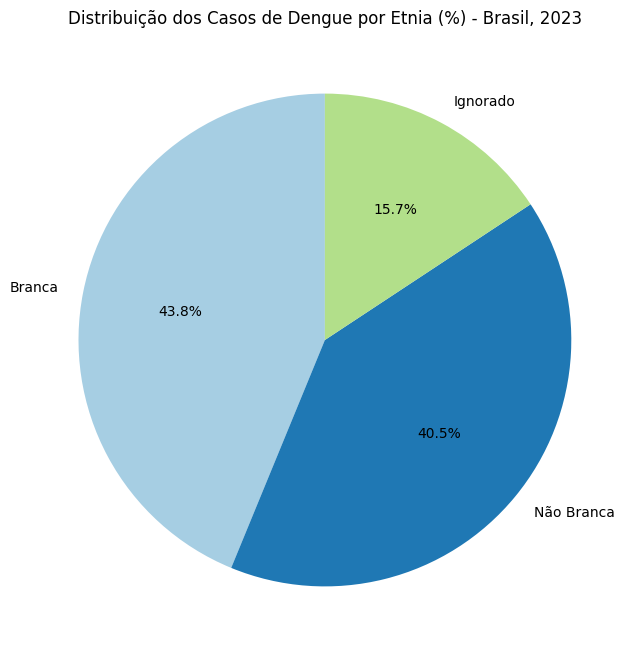

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(
    tab_etnia_resumida['Frequência'], 
    labels=tab_etnia_resumida['Etnia'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribuição dos Casos de Dengue por Etnia (%) - Brasil, 2023')
plt.show()


#### **3.3.4 Distribuição dos Casos de Dengue por Escolaridade**

In [28]:
df['CS_ESCOL_N'].value_counts()

CS_ESCOL_N
Ignorado                      761080
Ensino Médio completo         248932
Fundamental incompleto        141438
Não se aplica                 100595
Fundamental completo           90137
Ensino Médio incompleto        77019
Ensino superior completo       65024
Ensino Superior incompleto     21214
Name: count, dtype: int64

In [37]:
df['CS_ESCOL_N'].value_counts().loc[['Ignorado', 'Não se aplica']].sum()

861675

'Ignorado' e 'Não se Aplica' apresentam uma frequência muito grande no dataset, vamos excuí-los para melhor visualização do nível de escolaridade dos pacientes

In [33]:
df_escolaridade = df.query('CS_ESCOL_N != "Ignorado" & CS_ESCOL_N != "Não se aplica"')
df_escolaridade.shape

(643764, 35)

Tabulando as informações de escolaridade, exclusive 'Ignorado' e 'Não se aplica'

In [31]:
frequencia_escolaridade = df_escolaridade['CS_ESCOL_N'].value_counts()
frequencia_relativa_escolaridade = round(df_escolaridade['CS_ESCOL_N'].value_counts(normalize = True) * 100, 2)

# Criar o DataFrame tabulado
tab_escolaridade = pd.DataFrame({'Frequência': frequencia_escolaridade, 'Percentual (%)': frequencia_relativa_escolaridade})
tab_escolaridade.rename(columns={'index': 'Escolaridade'}, inplace=True)

# Renomear a coluna 'index' para 'Faixa Etária'
tab_escolaridade.index.name = 'Escolaridade'
tab_escolaridade = tab_escolaridade.reset_index()

#Invertendo a ordem para a plotagem
tab_escolaridade = tab_escolaridade.sort_values(by = 'Percentual (%)', ascending = True)

tab_escolaridade

,Escolaridade,Frequência,Percentual (%)
5,Ensino Superior incompleto,21214,3.30
4,Ensino superior completo,65024,10.10
3,Ensino Médio incompleto,77019,11.96
2,Fundamental completo,90137,14.00
1,Fundamental incompleto,141438,21.97
0,Ensino Médio completo,248932,38.67


Plotando um gráfico de barras com a distribuição por escolaridade

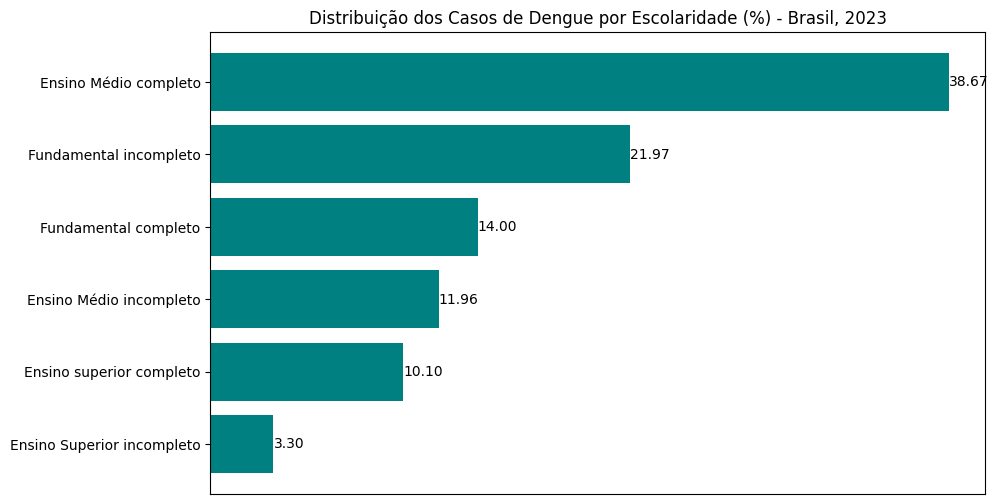

In [32]:
#Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(tab_escolaridade['Escolaridade'], tab_escolaridade['Percentual (%)'], color='teal')
plt.title('Distribuição dos Casos de Dengue por Escolaridade (%) - Brasil, 2023')
plt.xticks([])

# Exibir os valores em cada barra
for index, value in enumerate(tab_escolaridade['Percentual (%)']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

#### **3.3.5 Incidência de Dengue em Gestantes**

Tabulando as Informações de Gestação e Idade Gestacional

In [46]:
frequencia_gestante= df['CS_GESTANT'].value_counts()
frequencia_relativa_gestante= round(df['CS_GESTANT'].value_counts(normalize = True) * 100, 2)

# Criar o DataFrame tabulado
tab_gestante= pd.DataFrame({'Frequência': frequencia_gestante, 'Percentual (%)': frequencia_relativa_gestante})
tab_gestante.rename(columns={'index': 'Gestante'}, inplace=True)

# Renomear a coluna 'index' para 'Faixa Etária'
tab_gestante.index.name = 'Gestante'
tab_gestante= tab_gestante.reset_index()

tab_gestante

,Gestante,Frequência,Percentual (%)
0,Não se aplica,841987,55.93
1,Não,530218,35.22
2,Ignorado,121380,8.06
3,2º Trimestre,3728,0.25
4,3º Trimestre,3063,0.20
5,1º Trimestre,2984,0.20
6,Idade gestacional ignorada,2079,0.14


No dicionário de dados do SINAN, o campo de Gestação é automaticamente preenchido com 'Não se Aplica' para pessoas do gênero masculino ou do gênero feminino com idade menor ou igual a 10 anos.



In [39]:
gestante = tab_gestante[tab_gestante['Gestante'].isin(['1º Trimestre', '2º Trimestre', '3º Trimestre', 'Idade Gestacional Ignorada'])]['Frequência'].sum()
nao_gestante = tab_gestante[tab_gestante['Gestante'] == 'Não']['Frequência'].sum()
ignorado_gestante = tab_gestante[tab_gestante['Gestante'] == 'Ignorado']['Frequência'].sum()
total_gestante = gestante + nao_gestante + ignorado_gestante

In [42]:
tab_gestante_resumida = pd.DataFrame({
    'Gravidez': ['Gestante', 'Não Gestante', 'Ignorado'],
    'Frequência': [gestante, nao_gestante, ignorado],
    'Percentual (%)': [gestante/total_gestante*100, nao_gestante/total_gestante*100, ignorado/total_gestante*100]
})

tab_gestante_resumida

,Gravidez,Frequência,Percentual (%)
0,Gestante,9775,1.477986
1,Não Gestante,530218,80.169284
2,Ignorado,236605,35.774820


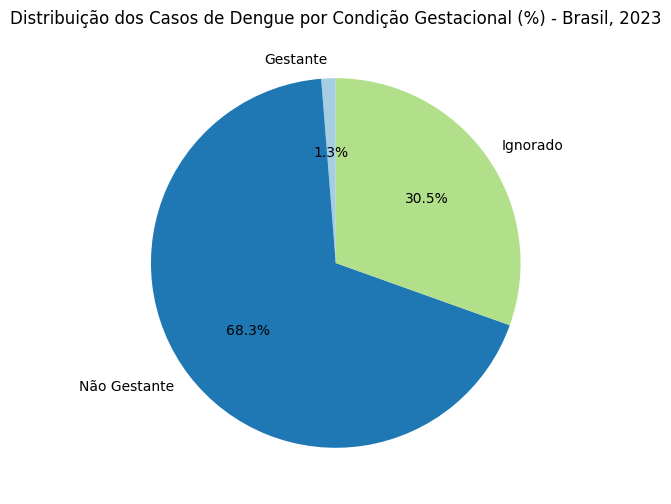

In [43]:
#Gráfico de Pizza de Gestação

plt.figure(figsize=(6, 6))
plt.pie(
    tab_gestante_resumida['Frequência'], 
    labels=tab_gestante_resumida['Gravidez'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribuição dos Casos de Dengue por Condição Gestacional (%) - Brasil, 2023')
plt.show()

Analisando os casos em gestantes por idade gestacional

In [51]:
trimestre_1 = tab_gestante[tab_gestante['Gestante'] == '1º Trimestre']['Frequência'].sum()
trimestre_2 = tab_gestante[tab_gestante['Gestante'] == '2º Trimestre']['Frequência'].sum()
trimestre_3 = tab_gestante[tab_gestante['Gestante'] == '3º Trimestre']['Frequência'].sum()
idade_gestacional_ignorada = tab_gestante[tab_gestante['Gestante'] == 'Idade gestacional ignorada']['Frequência'].sum()
total_gravidez = trimestre_1 + trimestre_2 + trimestre_3 + idade_gestacional_ignorada

In [52]:
tab_gravidez_resumida = pd.DataFrame({
    'Idade Gestacional': ['1º Trimestre', '2º Trimestre', '3º Trimestre', 'Idade Gestacional Ignorada'],
    'Frequência': [trimestre_1, trimestre_2, trimestre_3, idade_gestacional_ignorada],
    'Percentual (%)': [trimestre_1/total_gravidez*100, trimestre_2/total_gravidez*100, trimestre_3/total_gravidez*100, idade_gestacional_ignorada/total_gravidez*100]
})

tab_gravidez_resumida

,Idade Gestacional,Frequência,Percentual (%)
0,1º Trimestre,2984,25.172937
1,2º Trimestre,3728,31.449300
2,3º Trimestre,3063,25.839379
3,Idade Gestacional Ignorada,2079,17.538384


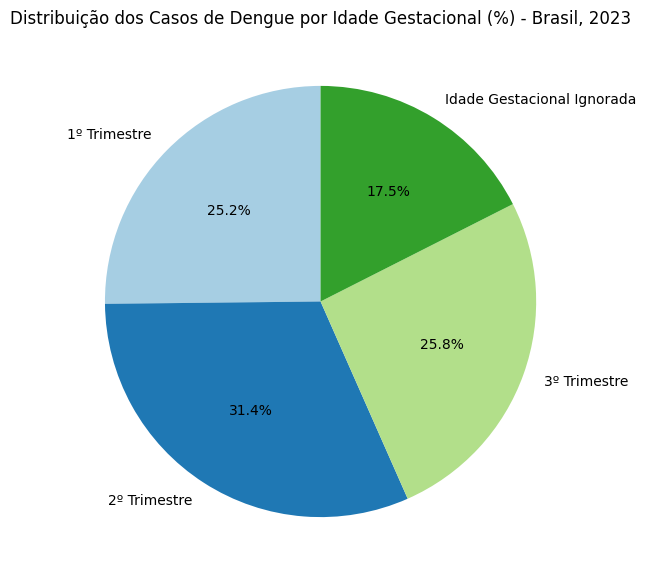

In [54]:
#Gráfico de Pizza das Gestantes

plt.figure(figsize=(7, 7))
plt.pie(
    tab_gravidez_resumida['Frequência'], 
    labels=tab_gravidez_resumida['Idade Gestacional'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribuição dos Casos de Dengue por Idade Gestacional (%) - Brasil, 2023')
plt.show()

### **3.4 Sintomas, Mortalidade e Evolução dos Casos de Dengue**

•	Quais são os sintomas mais comuns entre os casos notificados de dengue (FEBRE, MIALGIA, CEFALEIA, etc.)?

•	Existe uma relação entre a presença de sintomas graves (como LEUCOPENIA ou HEMATOLOG) e a evolução dos casos e/ou óbito?

•	Qual é a prevalência de comorbidades (DIABETES, RENAL, HIPERTENSA, etc.) entre os pacientes diagnosticados com dengue? Qual a relação entre a presença de comorbidades e a evolução/óbito?

•	Qual é a taxa de hospitalização (HOSPITALIZ) entre os pacientes diagnosticados com dengue?

•	Qual é a taxa de mortalidade (TARGET_OBITO) associada à dengue em 2023?

•	Existe alguma tendência temporal entre a data do início dos sintomas (DT_SIN_PRI) e a evolução dos casos (EVOLUCAO) ao longo do tempo?
